In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob
from enum import Enum


In [2]:
train = pd.read_csv('../data/preprocessed_train.csv')
test = pd.read_csv('../data/preprocessed_test.csv')

In [3]:
train.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,True
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,False
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",True
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,True
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,True


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20691 entries, 0 to 20690
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20173 non-null  object
 1   author  18759 non-null  object
 2   text    20652 non-null  object
 3   label   20691 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 505.3+ KB
title      518
author    1932
text        39
label        0
dtype: int64
title     0
author    0
text      0
label     0
dtype: int64


In [5]:
test.head()

,title,author,text
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


# EDA

## Pie Chart

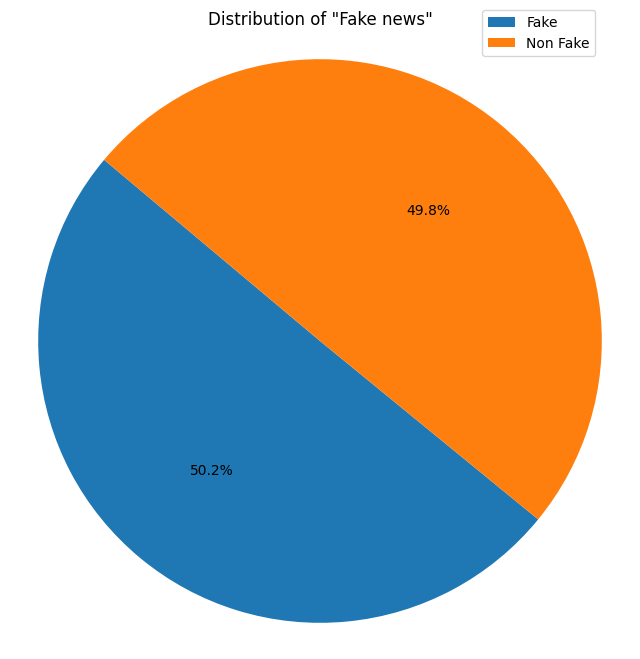

In [6]:
type_counts = train['label'].value_counts()
labels = ['Fake', 'Non Fake']

plt.figure(figsize=(8, 8))
plt.pie(type_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Fake news"')

plt.legend(labels, loc="center left", bbox_to_anchor=(0.75, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Title word cloud

In [20]:
fake_news_df = train[train['label'] == True].copy()
non_fake_news_df = train[train['label'] == False].copy()

title      518
author    1906
text        39
label        0
dtype: int64


In [9]:
wordcloud_fake = WordCloud(width=800, height=400, random_state=123, background_color='white').generate(fake_news_df['text'].to_string())

In [10]:
wordcloud_non_fake = WordCloud(width=800, height=400, random_state=123, background_color='white').generate(non_fake_news_df['text'].to_string())

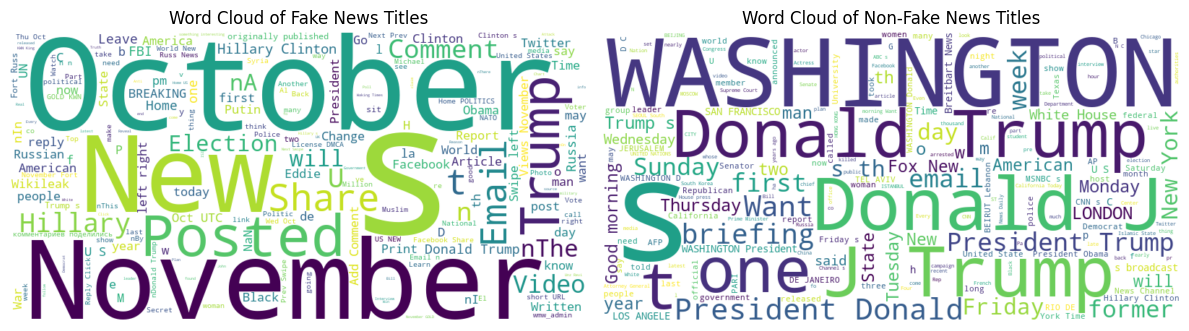

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Fake News Titles')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_fake, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Non-Fake News Titles')

plt.tight_layout()
plt.show()

## Sentiment Analysis

### Sentiment Scatter

In [22]:
fake_news_df['title_sentiment'] = fake_news_df['title'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
fake_news_df['content_sentiment'] = fake_news_df['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

non_fake_news_df['title_sentiment'] = non_fake_news_df['title'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
non_fake_news_df['content_sentiment'] = non_fake_news_df['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
# Calculate correlation between title and content sentiment for both DataFrames
fake_correlation = fake_news_df[['content_sentiment', 'title_sentiment']].corr().iloc[0, 1]
non_fake_correlation = non_fake_news_df[['content_sentiment', 'title_sentiment']].corr().iloc[0, 1]

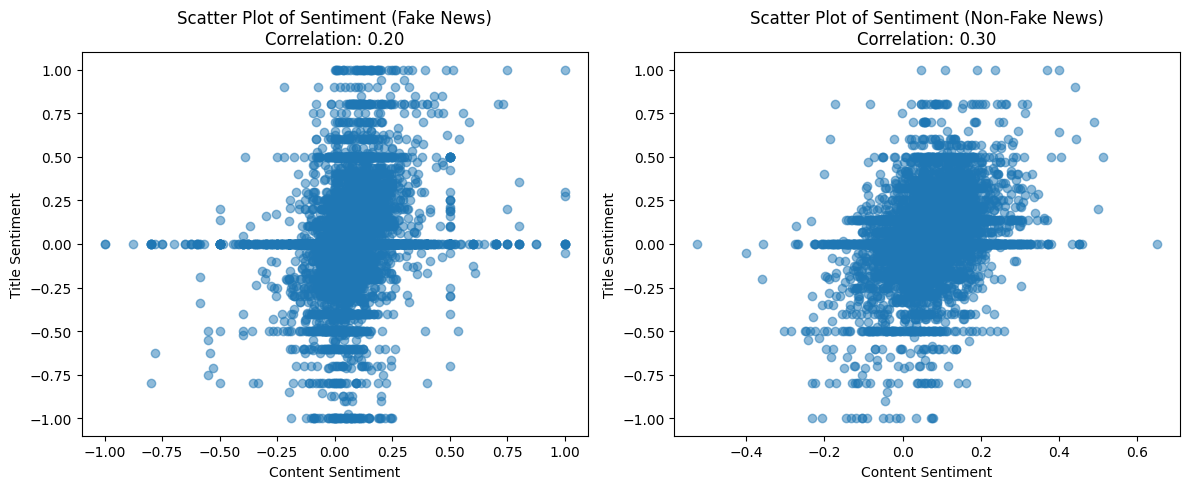

In [24]:
# Create scatter plots for "fake" and "non-fake" news with correlation in title
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(fake_news_df['content_sentiment'], fake_news_df['title_sentiment'], alpha=0.5)
plt.xlabel('Content Sentiment')
plt.ylabel('Title Sentiment')
plt.title(f'Scatter Plot of Sentiment (Fake News)\nCorrelation: {fake_correlation:.2f}')

plt.subplot(1, 2, 2)
plt.scatter(non_fake_news_df['content_sentiment'], non_fake_news_df['title_sentiment'], alpha=0.5)
plt.xlabel('Content Sentiment')
plt.ylabel('Title Sentiment')
plt.title(f'Scatter Plot of Sentiment (Non-Fake News)\nCorrelation: {non_fake_correlation:.2f}')

plt.tight_layout()
plt.show()

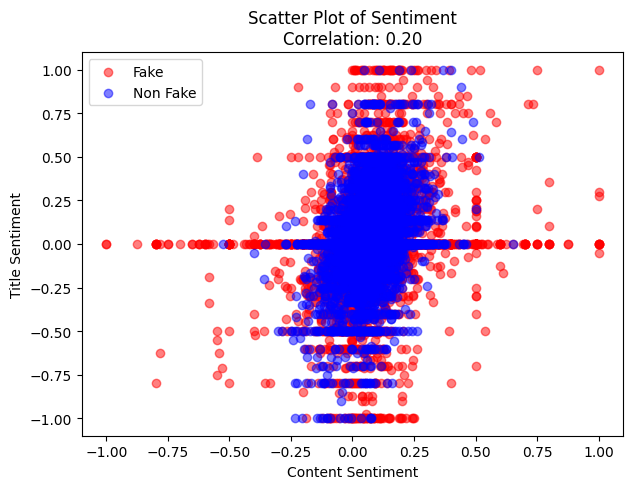

In [58]:
# Create scatter plots for "fake" and "non-fake" news with correlation in title
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(fake_news_df['content_sentiment'], fake_news_df['title_sentiment'], alpha=0.5, c='red', label="Fake")
plt.scatter(non_fake_news_df['content_sentiment'], non_fake_news_df['title_sentiment'], alpha=0.5, c='blue', label="Non Fake")
plt.xlabel('Content Sentiment')
plt.ylabel('Title Sentiment')
plt.title(f'Scatter Plot of Sentiment\nCorrelation: {fake_correlation:.2f}')
plt.legend()


plt.tight_layout()
plt.show()

### Sentiment heatmap

In [30]:
class Polarity(Enum):
    NEGATIVE = 0
    NEUTRAL = 1
    POSITIVE = 2

def discretize_sentiment(polarity):
    if polarity < -1/5: return Polarity.NEGATIVE.name
    elif -1/5 <= polarity <= 1/5: return Polarity.NEUTRAL.name
    return Polarity.POSITIVE.name

fake_news_df['title_sentiment_category'] = fake_news_df['title_sentiment'].apply(discretize_sentiment)
fake_news_df['content_sentiment_category'] = fake_news_df['content_sentiment'].apply(discretize_sentiment)

non_fake_news_df['title_sentiment_category'] = non_fake_news_df['title_sentiment'].apply(discretize_sentiment)
non_fake_news_df['content_sentiment_category'] = non_fake_news_df['content_sentiment'].apply(discretize_sentiment)

In [31]:
polarities = [polarity.name for polarity in Polarity]
polarities

['NEGATIVE', 'NEUTRAL', 'POSITIVE']

In [32]:
# Create pivot tables for the heatmaps and fill missing values


pivot_fake = fake_news_df.pivot_table(index='title_sentiment_category', columns='content_sentiment_category', aggfunc='size', fill_value=0)
pivot_fake = pivot_fake.reindex(columns=polarities, index=polarities, fill_value=0)

pivot_non_fake = non_fake_news_df.pivot_table(index='title_sentiment_category', columns='content_sentiment_category', aggfunc='size', fill_value=0)
pivot_non_fake = pivot_non_fake.reindex(columns=polarities, index=polarities, fill_value=0)

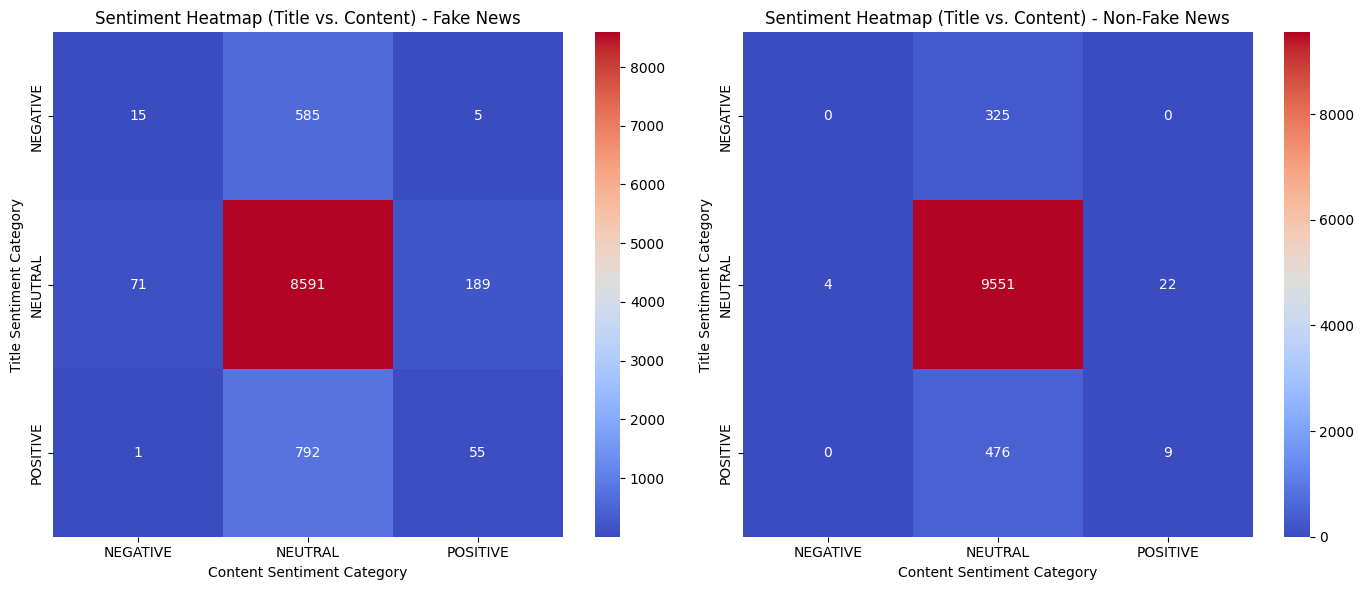

In [33]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the heatmap for "fake" news
sns.heatmap(pivot_fake, annot=True, fmt='d', cmap='coolwarm', cbar=True, ax=axes[0])
axes[0].set_xlabel('Content Sentiment Category')
axes[0].set_ylabel('Title Sentiment Category')
axes[0].set_title('Sentiment Heatmap (Title vs. Content) - Fake News')

# Plot the heatmap for "non-fake" news
sns.heatmap(pivot_non_fake, annot=True, fmt='d', cmap='coolwarm', cbar=True, ax=axes[1])
axes[1].set_xlabel('Content Sentiment Category')
axes[1].set_ylabel('Title Sentiment Category')
axes[1].set_title('Sentiment Heatmap (Title vs. Content) - Non-Fake News')

plt.tight_layout()
plt.show()

In [43]:
sentiment_analysis = train.copy()
sentiment_analysis['title_sentiment'] = sentiment_analysis['title'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_analysis['content_sentiment'] = sentiment_analysis['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_analysis['title_sentiment_category'] = sentiment_analysis['title_sentiment'].apply(discretize_sentiment)
sentiment_analysis['content_sentiment_category'] = sentiment_analysis['content_sentiment'].apply(discretize_sentiment)

In [83]:
sentiment_analysis['label'].value_counts()

label
False    10387
True     10304
Name: count, dtype: int64

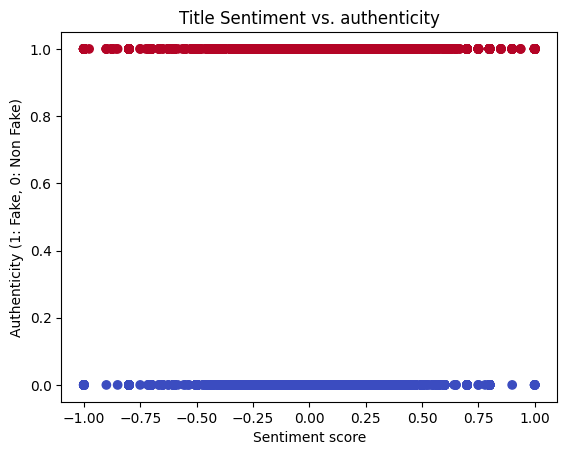

In [86]:
plt.scatter(sentiment_analysis['title_sentiment'], sentiment_analysis['label'], c=sentiment_analysis['label'], cmap='coolwarm')
plt.xlabel('Sentiment score')
plt.ylabel('Authenticity (1: Fake, 0: Non Fake)')
plt.title('Title Sentiment vs. authenticity')
plt.show()

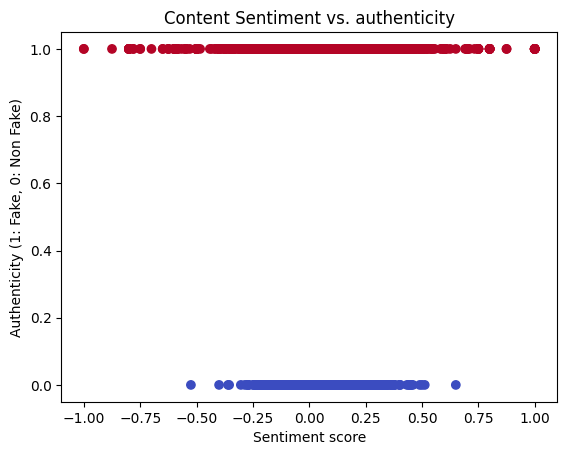

In [87]:
plt.scatter(sentiment_analysis['content_sentiment'], sentiment_analysis['label'], c=sentiment_analysis['label'], cmap='coolwarm')
plt.xlabel('Sentiment score')
plt.ylabel('Authenticity (1: Fake, 0: Non Fake)')
plt.title('Content Sentiment vs. authenticity')
plt.show()

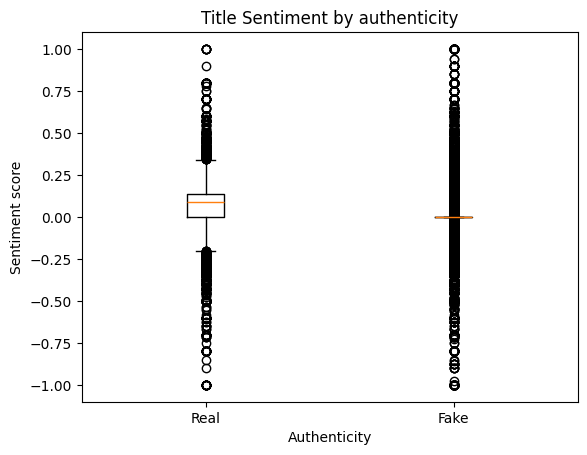

In [89]:
real_sentiment_scores = [score for score, label in zip(sentiment_analysis['title_sentiment'], sentiment_analysis['label']) if not label]
fake_sentiment_scores = [score for score, label in zip(sentiment_analysis['title_sentiment'], sentiment_analysis['label']) if label]
plt.boxplot([real_sentiment_scores, fake_sentiment_scores], labels=['Real', 'Fake'])
plt.xlabel('Authenticity')
plt.ylabel('Sentiment score')
plt.title('Title Sentiment by authenticity')
plt.show()

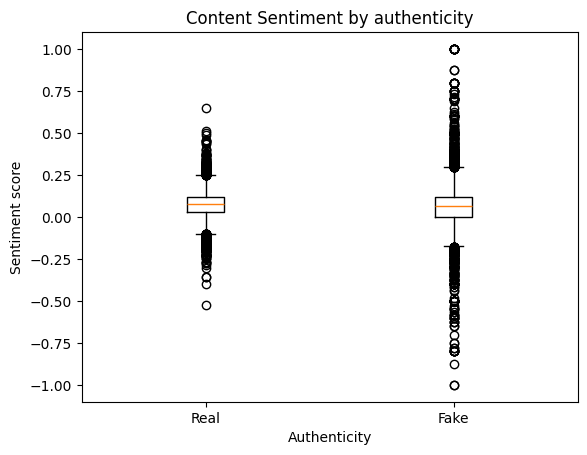

In [91]:
real_sentiment_scores = [score for score, label in zip(sentiment_analysis['content_sentiment'], sentiment_analysis['label']) if not label]
fake_sentiment_scores = [score for score, label in zip(sentiment_analysis['content_sentiment'], sentiment_analysis['label']) if label]
plt.boxplot([real_sentiment_scores, fake_sentiment_scores], labels=['Real', 'Fake'])
plt.xlabel('Authenticity')
plt.ylabel('Sentiment score')
plt.title('Content Sentiment by authenticity')
plt.show()

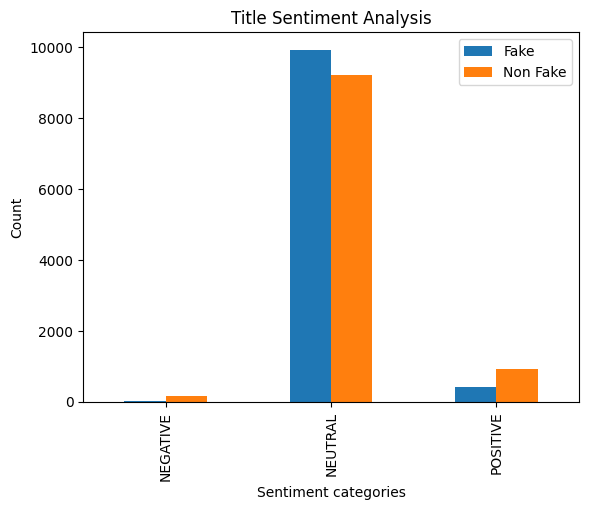

In [56]:
# Create a pivot table with sentiment categories as rows, label as columns, and count as values
pivot_table = pd.pivot_table(sentiment_analysis, values='title_sentiment_category', index=['content_sentiment_category'], columns=['label'], aggfunc=len)

# Plot the clustered bar chart
pivot_table.plot(kind='bar', stacked=False)

# Set the chart title and axis labels
plt.title('Title Sentiment Analysis')
plt.xlabel('Sentiment categories')
plt.ylabel('Count')
plt.legend(labels)

# Show the chart
plt.show()

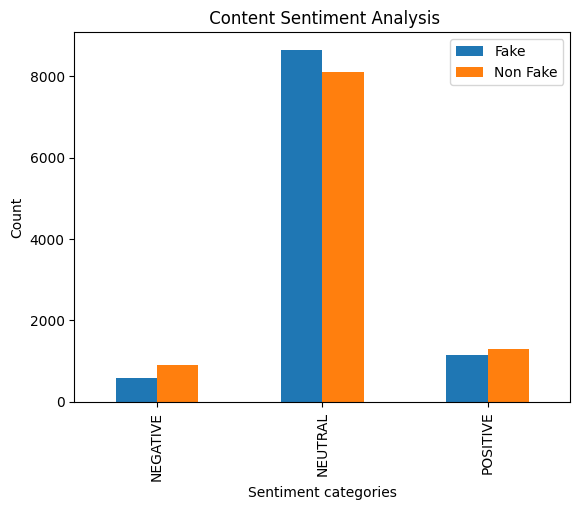

In [57]:
pivot_table = pd.pivot_table(sentiment_analysis, values='content_sentiment_category', index=['title_sentiment_category'], columns=['label'], aggfunc=len)

# Plot the clustered bar chart
pivot_table.plot(kind='bar', stacked=False)

# Set the chart title and axis labels
plt.title(' Content Sentiment Analysis')
plt.xlabel('Sentiment categories')
plt.ylabel('Count')
plt.legend(labels)


# Show the chart
plt.show()